<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B4%5D_cHB_XgBoost_KFold_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv('/content/Feed Effect on Biocrude Yield Data ML 080920.csv')
Oil_Yields = data['Bio-crude Oil Yield']
Features = data.drop('Bio-crude Oil Yield', axis = 1)

# Success
print ("Bio-crude dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude dataset has 225 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
0,100.000000,0.001,0.001,0.001,0.001,0.001,0.001,85.50
30,30.906000,27.270,0.001,0.001,32.724,0.001,9.100,41.00
60,13.300000,25.500,0.001,0.001,38.700,0.001,0.001,27.10
90,6.521739,65.217,0.001,0.001,20.652,0.001,8.000,38.00
120,1.933333,23.433,66.400,0.001,7.967,0.001,0.001,23.60
150,0.001000,0.001,0.001,0.001,100.000,0.001,0.001,1.29
180,0.001000,0.001,39.200,35.100,0.001,20.200,0.001,26.98
210,0.001000,0.001,0.001,100.000,0.001,0.001,0.001,6.50


In [ ]:
# TODO: Minimum price of the data
minimum_Oil_Yields = np.min(Oil_Yields)

# TODO: Maximum price of the data
maximum_Oil_Yields = np.max(Oil_Yields)

# TODO: Mean price of the data
mean_Oil_Yields = np.mean(Oil_Yields)

# TODO: Median price of the data
median_Oil_Yields = np.median(Oil_Yields)

# TODO: Standard deviation of prices of the data
std_Oil_Yields = np.std(Oil_Yields)

# Show the calculated statistics

print("Statistics for bio-crude dataset:\n")
print("Minimum bio-crude oil yield:{: .2f} wt%".format(minimum_Oil_Yields))
print("Maximum bio-crude oil yield:{: .2f} wt%".format(maximum_Oil_Yields))
print("Mean bio-crude oil yield:{: .2f} wt%".format(mean_Oil_Yields))
print("Median bio-crude oil yield:{: .2f} wt%".format(median_Oil_Yields))
print("Standard deviation of bio-crude oil yield:{: .2f} wt%".format(std_Oil_Yields))

data.describe()

Statistics for bio-crude dataset:

Minimum bio-crude oil yield: 0.10 wt%
Maximum bio-crude oil yield: 95.86 wt%
Mean bio-crude oil yield: 27.44 wt%
Median bio-crude oil yield: 24.70 wt%
Standard deviation of bio-crude oil yield: 16.71 wt%


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil Yield
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,11.914957,26.309120,17.238889,7.373533,17.048222,9.141262,6.412529,27.438684
std,20.186968,25.336847,25.591166,15.388090,23.677315,17.012555,10.787539,16.748694
min,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.100000
25%,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,15.900000
50%,3.500000,23.077000,0.001000,0.001000,8.700000,0.001000,1.100000,24.700000
75%,13.880000,46.420000,29.200000,8.800000,25.460000,14.200000,7.000000,36.300000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,95.860000


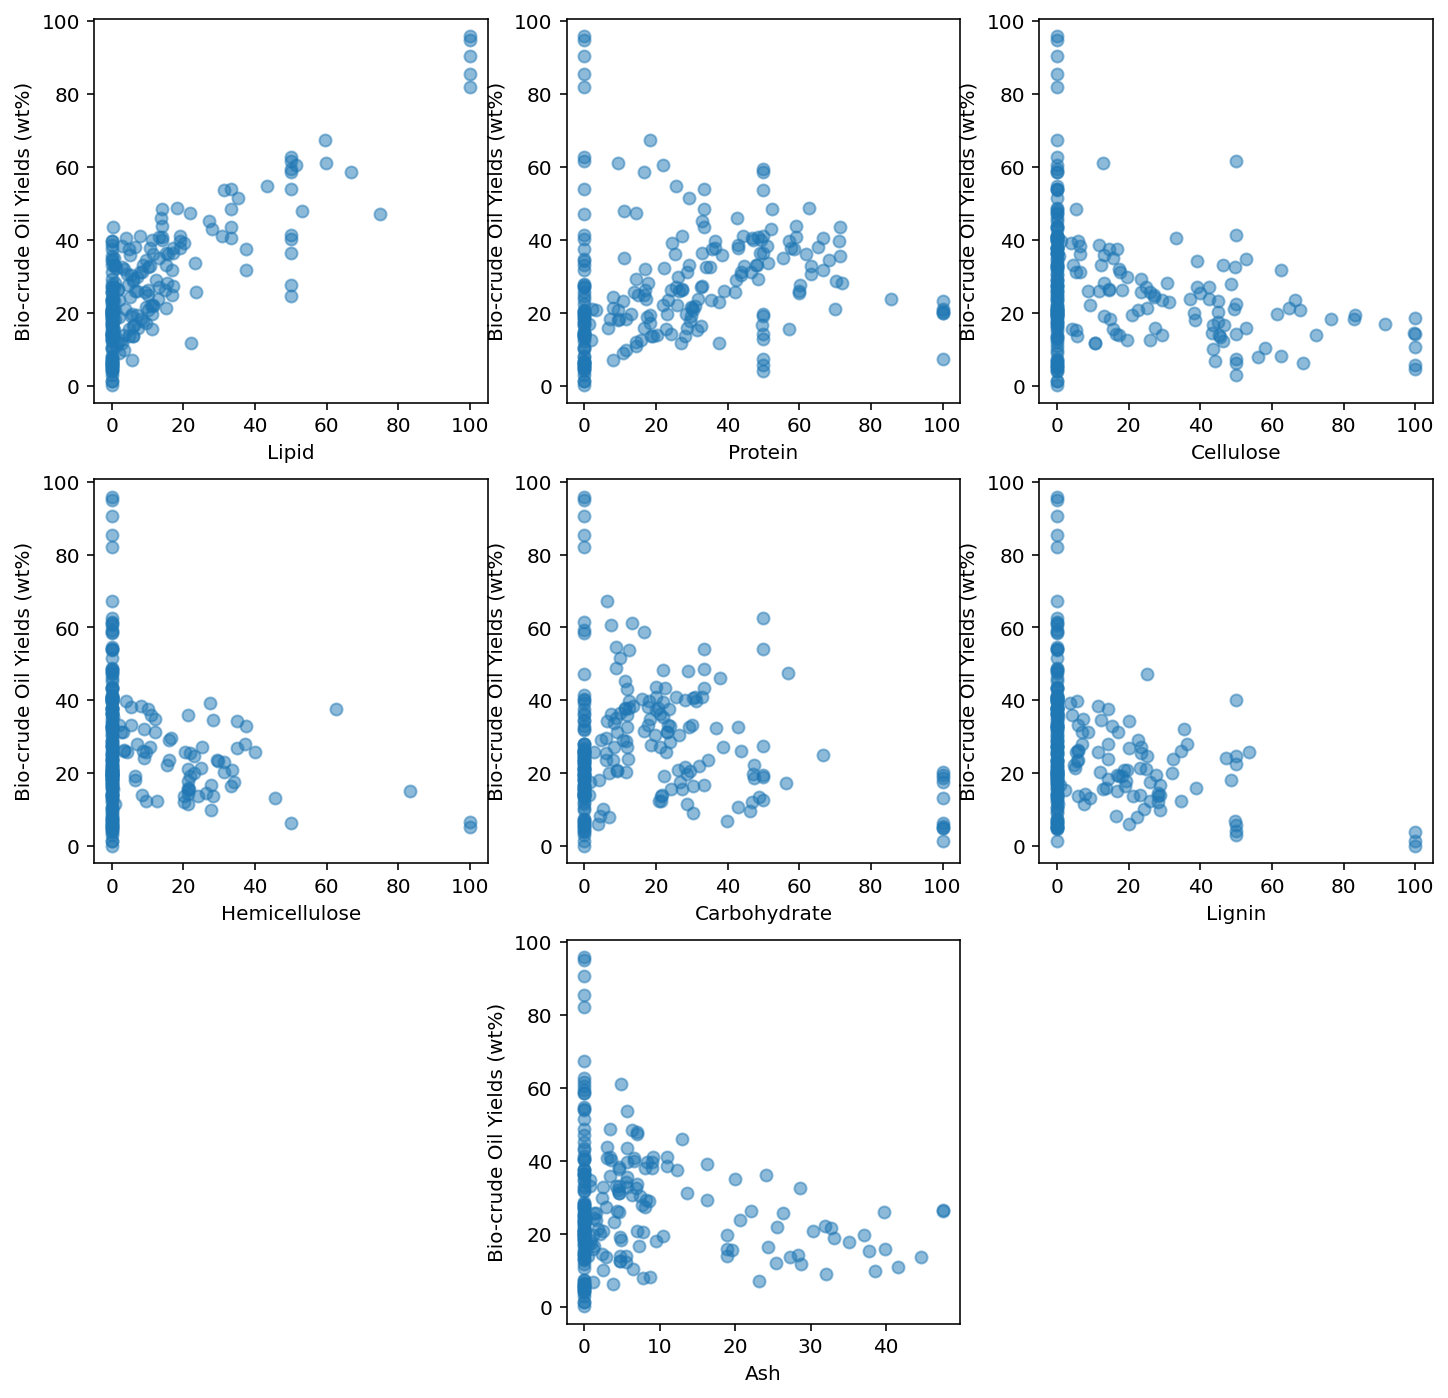

In [ ]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lipid'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Protein'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Lignin'],data['Bio-crude Oil Yield'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil Yields (wt%)')
plt.scatter(data['Ash'],data['Bio-crude Oil Yield'],alpha = 0.5)
plt.show()

(array([ 3.,  2.,  8.,  8.,  3.,  5., 10., 13., 11., 12., 20.,  8., 11.,
        12., 11.,  6.,  9.,  9.,  8., 10.,  8.,  8.,  4.,  2.,  2.,  4.,
         1.,  0.,  4.,  0.,  3.,  2.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([ 0.1   ,  2.0152,  3.9304,  5.8456,  7.7608,  9.676 , 11.5912,
        13.5064, 15.4216, 17.3368, 19.252 , 21.1672, 23.0824, 24.9976,
        26.9128, 28.828 , 30.7432, 32.6584, 34.5736, 36.4888, 38.404 ,
        40.3192, 42.2344, 44.1496, 46.0648, 47.98  , 49.8952, 51.8104,
        53.7256, 55.6408, 57.556 , 59.4712, 61.3864, 63.3016, 65.2168,
        67.132 , 69.0472, 70.9624, 72.8776, 74.7928, 76.708 , 78.6232,
        80.5384, 82.4536, 84.3688, 86.284 , 88.1992, 90.1144, 92.0296,
        93.9448, 95.86  ]),
 <a list of 50 Patch objects>)

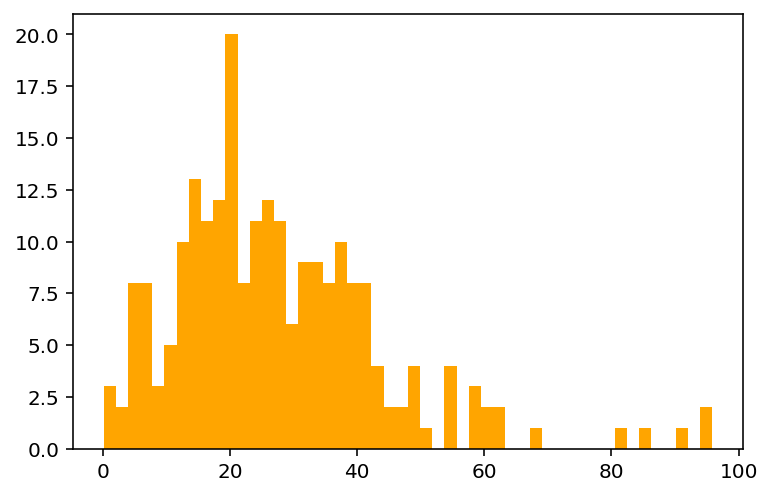

In [ ]:
plt.hist(data['Bio-crude Oil Yield'],bins=50,color='orange')

(array([105.,  11.,  15.,  10.,  10.,  11.,   9.,   7.,   5.,   4.,   2.,
          3.,   0.,   2.,   0.,   2.,   4.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,  10.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   5.]),
 array([1.000000e-03, 2.000980e+00, 4.000960e+00, 6.000940e+00,
        8.000920e+00, 1.000090e+01, 1.200088e+01, 1.400086e+01,
        1.600084e+01, 1.800082e+01, 2.000080e+01, 2.200078e+01,
        2.400076e+01, 2.600074e+01, 2.800072e+01, 3.000070e+01,
        3.200068e+01, 3.400066e+01, 3.600064e+01, 3.800062e+01,
        4.000060e+01, 4.200058e+01, 4.400056e+01, 4.600054e+01,
        4.800052e+01, 5.000050e+01, 5.200048e+01, 5.400046e+01,
        5.600044e+01, 5.800042e+01, 6.000040e+01, 6.200038e+01,
        6.400036e+01, 6.600034e+01, 6.800032e+01, 7.000030e+01,
        7.200028e+01, 7.400026e+01, 7.600024e+01, 7.800022e+01,
        8.000020e+

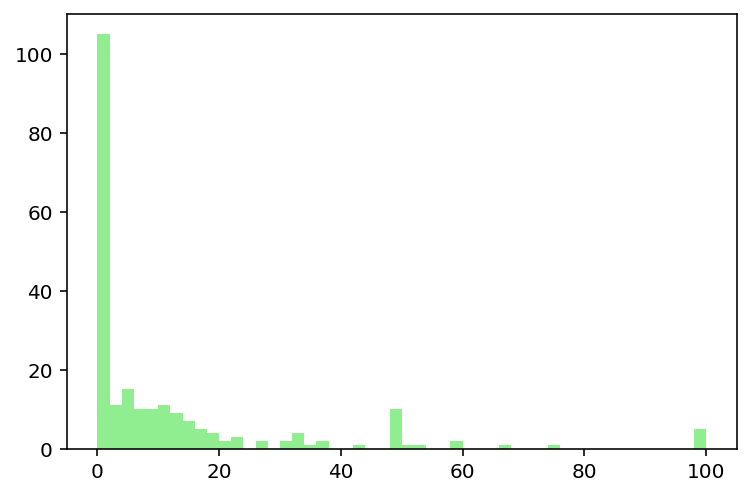

In [ ]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


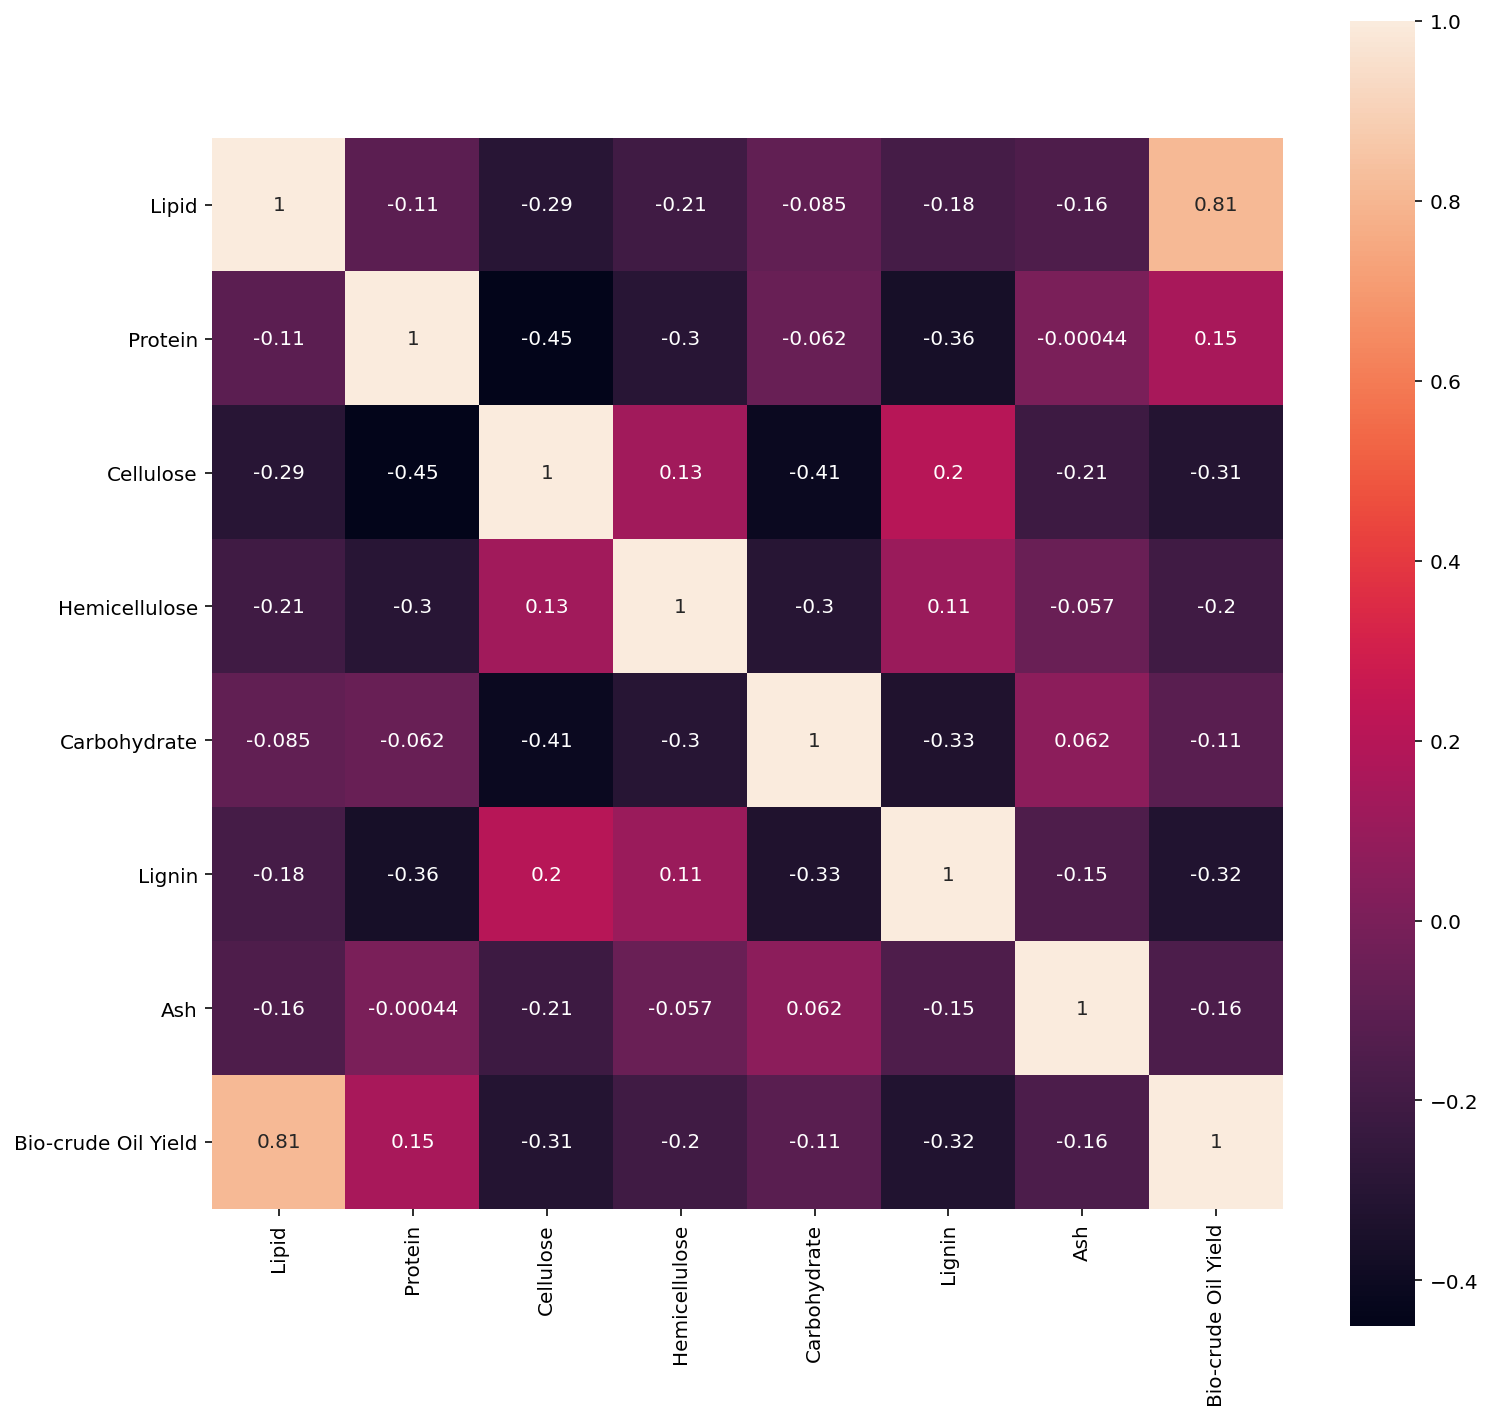

In [ ]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [ ]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)

In [ ]:
for i in range(0,100,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = i)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.9357516756069165
Standard deviation of R2 of training set 0.009160050155453629
Mean value of R2 of test set 0.7262092977132584
Standard deviation of R2 of test set 0.10796840292273585
1
Mean value of R2 of training set 0.9324358082705961
Standard deviation of R2 of training set 0.010382478402611358
Mean value of R2 of test set 0.7628281868846056
Standard deviation of R2 of test set 0.03906300092347449
2
Mean value of R2 of training set 0.9341885136758149
Standard deviation of R2 of training set 0.009881592845148827
Mean value of R2 of test set 0.6890592517612525
Standard deviation of R2 of test set 0.1878193784354449
3
Mean value of R2 of training set 0.9317091334915608
Standard deviation of R2 of training set 0.007585614160821208
Mean value of R2 of test set 0.7499914946203832
Standard deviation of R2 of test set 0.06768664872669089
4
Mean value of R2 of training set 0.9335600410147767
Standard deviation of R2 of training set 0.003742215115569037
M

In [ ]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 10 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    model = XGBRegressor(silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 3.1575656330892774
Standard deviation of MAE of test set 0.21126529892329482
Mean value of MAE of training set 5.984147271296184
Standard deviation of MAE of test set 0.49083967230764103

Mean value of RMSE of training set 4.312963227367675
Standard deviation of RMSE of training set 0.23806983528800382
Mean value of RMSE of test set 7.679406654366408
Standard deviation of RMSE of test set 0.9126886974462027

Mean value of R2 of training set 0.9331310873118754
Standard deviation of R2 of training set 0.00794746259657351
Mean value of R2 of test set 0.7821299157068763
Standard deviation of R2 of test set 0.058988194113175046

Mean value of MRE of training set 0.11511473061511854
Standard deviation of MRE of test set 0.008183119128256696
Mean value of MRE of training set 0.21845414009607328
Standard deviation of MRE of test set 0.020691304103874184


Text(0.5, 1.0, 'y_pred vs. y_true')

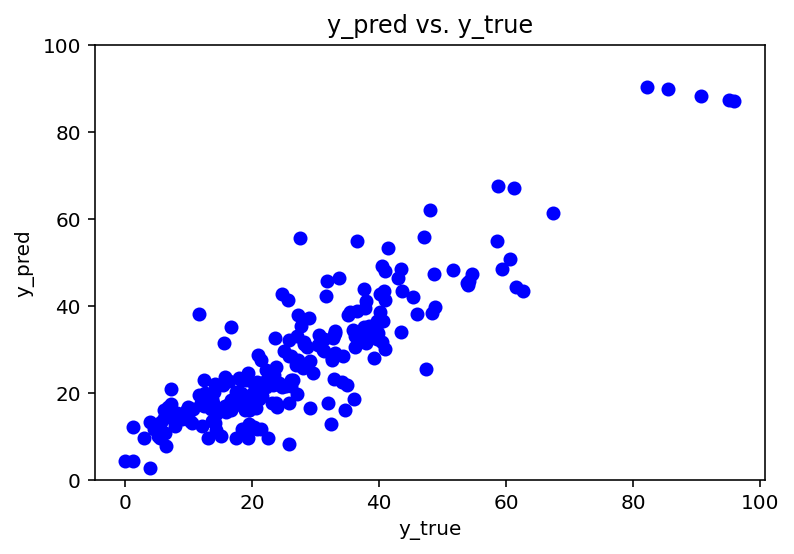

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost.csv', index = False, header=True)

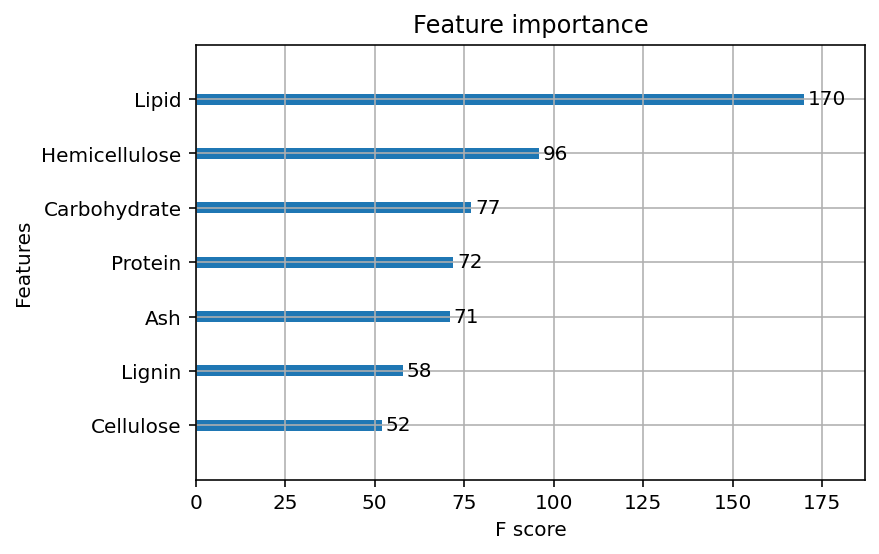

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 500, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'n_estimators': np.linspace(10, 110, 11, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'n_estimators': 40}
最佳模型得分: 0.6927361093234188


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    2.4s finished


In [ ]:
# n_estimators 参数的最佳取值(10, 110, 11)

for i in range(10, 120, 10):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': i, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

10
Mean value of R2 of training set 0.35402512972403855
Standard deviation of R2 of training set 0.019952253882818696
Mean value of R2 of test set 0.2894606349122224
Standard deviation of R2 of test set 0.09983431318670889
20
Mean value of R2 of training set 0.8205675888784402
Standard deviation of R2 of training set 0.012685118917467299
Mean value of R2 of test set 0.7107205663478499
Standard deviation of R2 of test set 0.07348430772399452
30
Mean value of R2 of training set 0.9047523625482695
Standard deviation of R2 of training set 0.008458290305171052
Mean value of R2 of test set 0.763275941675076
Standard deviation of R2 of test set 0.06606369131769342
40
Mean value of R2 of training set 0.9297001122095796
Standard deviation of R2 of training set 0.007822053959603236
Mean value of R2 of test set 0.7732009026060808
Standard deviation of R2 of test set 0.07097651454840244
50
Mean value of R2 of training set 0.9397594283084854
Standard deviation of R2 of training set 0.00797064488518

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 6, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'max_depth': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'max_depth': 5}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [ ]:
# max_depth 参数的最佳取值(1, 10, 10)

for i in range(1, 20, 1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': i, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

1
Mean value of R2 of training set 0.7721117709965972
Standard deviation of R2 of training set 0.015509010541246001
Mean value of R2 of test set 0.7266384574884681
Standard deviation of R2 of test set 0.055366497622661145
2
Mean value of R2 of training set 0.85202574612563
Standard deviation of R2 of training set 0.010076786687186685
Mean value of R2 of test set 0.7740754205566356
Standard deviation of R2 of test set 0.05874334327725141
3
Mean value of R2 of training set 0.8971207868055588
Standard deviation of R2 of training set 0.01141813279265497
Mean value of R2 of test set 0.7726002656879426
Standard deviation of R2 of test set 0.06293916336720322
4
Mean value of R2 of training set 0.9255636579987694
Standard deviation of R2 of training set 0.008595299202973325
Mean value of R2 of test set 0.7699183078240508
Standard deviation of R2 of test set 0.07621398492196065
5
Mean value of R2 of training set 0.9397594283084854
Standard deviation of R2 of training set 0.007970644885180015
Me

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'min_child_weight': np.linspace(1, 10, 10, dtype=int)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'min_child_weight': 1}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [ ]:
# min_child_weight 参数的最佳取值(1, 10, 10)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': i/10,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855354731215
Mean value of R2 of test set 0.7901510558005329
Standard deviation of R2 of test set 0.08074102354908878
0.1
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855354731215
Mean value of R2 of test set 0.7901510558005329
Standard deviation of R2 of test set 0.08074102354908878
0.2
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855354731215
Mean value of R2 of test set 0.7901510558005329
Standard deviation of R2 of test set 0.08074102354908878
0.3
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855354731215
Mean value of R2 of test set 0.7901510558005329
Standard deviation of R2 of test set 0.08074102354908878
0.4
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'gamma': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'gamma': 0.0}
最佳模型得分: 0.7007533978168972


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [ ]:
# gamma 参数的最佳取值(0, 0.1, 11)

for i in range(0,11,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': i/100, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9568564308540068
Standard deviation of R2 of training set 0.006190855354731215
Mean value of R2 of test set 0.7901510558005329
Standard deviation of R2 of test set 0.08074102354908878
0.01
Mean value of R2 of training set 0.9568750705233787
Standard deviation of R2 of training set 0.006134827791932851
Mean value of R2 of test set 0.7894208176472608
Standard deviation of R2 of test set 0.0813373057345461
0.02
Mean value of R2 of training set 0.9568589893865538
Standard deviation of R2 of training set 0.006158853060904745
Mean value of R2 of test set 0.789120666282674
Standard deviation of R2 of test set 0.08098022154628369
0.03
Mean value of R2 of training set 0.9568716698407007
Standard deviation of R2 of training set 0.0061133721885668815
Mean value of R2 of test set 0.7895403612724424
Standard deviation of R2 of test set 0.08070506133442208
0.04
Mean value of R2 of training set 0.9568527599039983
Standard deviation of R2 of training set 0.006118

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'subsample': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'subsample': 0.6000000000000001}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [ ]:
# subsample 参数的最佳取值(0, 1, 11)

for i in range(55,71,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': i/100, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.55
Mean value of R2 of training set 0.9555677892817117
Standard deviation of R2 of training set 0.006001762410182334
Mean value of R2 of test set 0.7860397100037166
Standard deviation of R2 of test set 0.07136212594148045
0.56
Mean value of R2 of training set 0.955918357202177
Standard deviation of R2 of training set 0.006009899143317026
Mean value of R2 of test set 0.7824781370350893
Standard deviation of R2 of test set 0.07513411645771079
0.57
Mean value of R2 of training set 0.9557631994619644
Standard deviation of R2 of training set 0.0059335849180504885
Mean value of R2 of test set 0.7854667473327087
Standard deviation of R2 of test set 0.07407530077691091
0.58
Mean value of R2 of training set 0.9560869818819325
Standard deviation of R2 of training set 0.006277770675324471
Mean value of R2 of test set 0.780768012055749
Standard deviation of R2 of test set 0.07087171491630503
0.59
Mean value of R2 of training set 0.9562878181949429
Standard deviation of R2 of training set 0.00618

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'colsample_bytree': np.linspace(0, 1, 11)[1:]}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'colsample_bytree': 1.0}
最佳模型得分: 0.7022748805402046


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [ ]:
# colsample_bytree 参数的最佳取值(0, 1, 11)

for i in range(55,79,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': i/100, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.55
Mean value of R2 of training set 0.9423729557458618
Standard deviation of R2 of training set 0.00727923629105109
Mean value of R2 of test set 0.7907836960670747
Standard deviation of R2 of test set 0.07456220645039913
0.56
Mean value of R2 of training set 0.9423729557458618
Standard deviation of R2 of training set 0.00727923629105109
Mean value of R2 of test set 0.7907836960670747
Standard deviation of R2 of test set 0.07456220645039913
0.57
Mean value of R2 of training set 0.9423729557458618
Standard deviation of R2 of training set 0.00727923629105109
Mean value of R2 of test set 0.7907836960670747
Standard deviation of R2 of test set 0.07456220645039913
0.58
Mean value of R2 of training set 0.9527398859357351
Standard deviation of R2 of training set 0.006426918758267127
Mean value of R2 of test set 0.7927501666091018
Standard deviation of R2 of test set 0.07574498046111179
0.59
Mean value of R2 of training set 0.9527398859357351
Standard deviation of R2 of training set 0.0064269

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 1, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_lambda': np.linspace(0, 1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_lambda': 0.7000000000000001}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.7s finished


In [ ]:
# reg_lambda 参数的最佳取值(0, 1, 11)

for i in range(9161,9179,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': i/10000, 'reg_alpha': 0,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/10000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.9161
Mean value of R2 of training set 0.9499753444972041
Standard deviation of R2 of training set 0.006935250731980561
Mean value of R2 of test set 0.7974242551228379
Standard deviation of R2 of test set 0.07318052982317388
0.9162
Mean value of R2 of training set 0.9500294946669708
Standard deviation of R2 of training set 0.006859808844200336
Mean value of R2 of test set 0.7980186319648233
Standard deviation of R2 of test set 0.0738629102585312
0.9163
Mean value of R2 of training set 0.9500287520810746
Standard deviation of R2 of training set 0.006859577711202055
Mean value of R2 of test set 0.7980089376411854
Standard deviation of R2 of test set 0.07384686920556767
0.9164
Mean value of R2 of training set 0.95002785737416
Standard deviation of R2 of training set 0.00685959774517781
Mean value of R2 of test set 0.7980091209865471
Standard deviation of R2 of test set 0.07384673465131392
0.9165
Mean value of R2 of training set 0.9500269540076326
Standard deviation of R2 of training set 

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb
  
np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
  
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'reg_alpha': np.linspace(0, 0.1, 11)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'reg_alpha': 0.0}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    0.8s finished


In [ ]:
# reg_alpha 参数的最佳取值(0, 1, 11)

for i in range(181,199,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.9169, 'reg_alpha': i/1000,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/1000)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.181
Mean value of R2 of training set 0.949194924399935
Standard deviation of R2 of training set 0.006730961600577354
Mean value of R2 of test set 0.8039698940584771
Standard deviation of R2 of test set 0.07063690308885952
0.182
Mean value of R2 of training set 0.9491590095004652
Standard deviation of R2 of training set 0.006688687888066662
Mean value of R2 of test set 0.8026315296908819
Standard deviation of R2 of test set 0.0718414725422595
0.183
Mean value of R2 of training set 0.9491313802439549
Standard deviation of R2 of training set 0.00666228149993334
Mean value of R2 of test set 0.803496199569601
Standard deviation of R2 of test set 0.0708481415702968
0.184
Mean value of R2 of training set 0.9491222295525918
Standard deviation of R2 of training set 0.0066599572048484075
Mean value of R2 of test set 0.803496469907766
Standard deviation of R2 of test set 0.07084575883533614
0.185
Mean value of R2 of training set 0.9491151802938352
Standard deviation of R2 of training set 0.0066

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn import metrics
import xgboost as xgb

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields,test_size = 0.2)

other_params = {'eta': 0.3, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

cv_params = {'eta': np.logspace(-2, 0, 10)}
regress_model = xgb.XGBRegressor(**other_params)  # 注意这里的两个 * 号！
gs = GridSearchCV(regress_model, cv_params, verbose=2, refit=True, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)  # X为训练数据的特征值，y为训练数据的label
# 性能测评
print("参数的最佳取值：:", gs.best_params_)
print("最佳模型得分:", gs.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[04:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
参数的最佳取值：: {'eta': 0.01}
最佳模型得分: 0.7106288211422422


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.7s finished


In [ ]:
# eta 参数的最佳取值(-2, 0, 10)

for i in range(0,10,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': i/100, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.9169, 'reg_alpha': 0.19,
                'seed': 33}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i/100)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0.0
Mean value of R2 of training set 0.9491008973678545
Standard deviation of R2 of training set 0.006747944122051351
Mean value of R2 of test set 0.8052921221783625
Standard deviation of R2 of test set 0.07091866116205209
0.01
Mean value of R2 of training set 0.9491008973678545
Standard deviation of R2 of training set 0.006747944122051351
Mean value of R2 of test set 0.8052921221783625
Standard deviation of R2 of test set 0.07091866116205209
0.02
Mean value of R2 of training set 0.9491008973678545
Standard deviation of R2 of training set 0.006747944122051351
Mean value of R2 of test set 0.8052921221783625
Standard deviation of R2 of test set 0.07091866116205209
0.03
Mean value of R2 of training set 0.9491008973678545
Standard deviation of R2 of training set 0.006747944122051351
Mean value of R2 of test set 0.8052921221783625
Standard deviation of R2 of test set 0.07091866116205209
0.04
Mean value of R2 of training set 0.9491008973678545
Standard deviation of R2 of training set 0.00674

In [ ]:
# seed 参数的最佳取值(0, 100, 1)

for i in range(0,101,1):

  # TODO: Import 'RandomForestRegressor'
  from xgboost import XGBRegressor
  
  # TODO: Import 'KFold'
  from sklearn.model_selection import KFold
  
  # TODO Calculate the r2 score between 'y_true' and 'y_predict'
  from math import sqrt
  from sklearn import metrics
  
  np.random.seed(seed = 79)
  data['random'] = np.random.random(size = len(data))
  
  # Lets split the data into 5 folds.  
  kf =KFold(n_splits=5, shuffle=True)
  
  cnt = 1
  r2_train_all=[]
  r2_test_all=[]
  
  # split()  method generate indices to split data into training and test set.
  for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.9169, 'reg_alpha': 0.19,
                'seed': i}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("")

    cnt += 1
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
  
  print(i)
  print("Mean value of R2 of training set", np.mean(r2_train_all))
  print("Standard deviation of R2 of training set", np.std(r2_train_all))
  print("Mean value of R2 of test set", np.mean(r2_test_all))
  print("Standard deviation of R2 of test set", np.std(r2_test_all))

0
Mean value of R2 of training set 0.9485571049557237
Standard deviation of R2 of training set 0.006555900615868112
Mean value of R2 of test set 0.7877102787015478
Standard deviation of R2 of test set 0.07944250211804416
1
Mean value of R2 of training set 0.9476496077274892
Standard deviation of R2 of training set 0.006117382265043199
Mean value of R2 of test set 0.7838933286422807
Standard deviation of R2 of test set 0.07648596868465006
2
Mean value of R2 of training set 0.9496564376751501
Standard deviation of R2 of training set 0.0071586567198107815
Mean value of R2 of test set 0.7874794746931431
Standard deviation of R2 of test set 0.074894375076936
3
Mean value of R2 of training set 0.9466251022567814
Standard deviation of R2 of training set 0.006574346094754599
Mean value of R2 of test set 0.7803427148936467
Standard deviation of R2 of test set 0.0837495134466248
4
Mean value of R2 of training set 0.9436268846643039
Standard deviation of R2 of training set 0.006348419663273504
Me

[05:11:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal model has RMSE of training set: 4.794023577965594
Optimal model has RMSE of test set: 7.632683974683252
Optimal model has R2 score of training set 0.91 on test data.
Optimal model has R2 score of test set 0.85 on test data.
Predicted bio-crude oil yield for the composition of Feedstock 1: 34.91 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 39.48 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 31.81 wt%


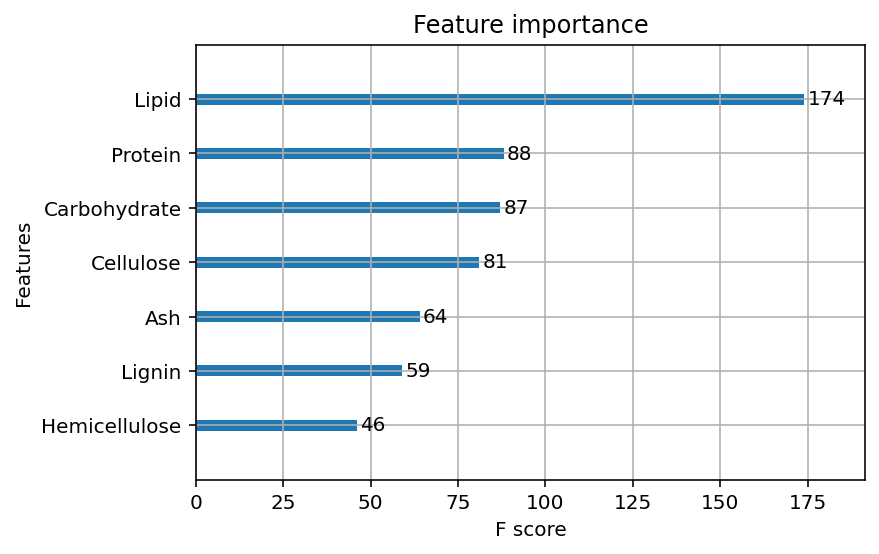

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_Yields, test_size = 0.2)
  
other_params = {'eta': 0.01, 'n_estimators': 40, 'gamma': 0, 'max_depth': 5, 'min_child_weight': 1,
                'colsample_bytree': 1, 'colsample_bylevel': 1, 'subsample': 0.6000000000000001, 'reg_lambda': 0.7000000000000001, 'reg_alpha': 0,
                'seed': 33}

model = XGBRegressor(**other_params,silent = True)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
r2_train = performance_metric(y_train, y_train_predict)
r2_test = performance_metric(y_test, y_test_predict)

print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on test data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))

# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [{'Lipid':21.9, 'Protein':17.8, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':58.9, 'Lignin':0, 'Ash':1.1}, # Model Food Waste
                              {'Lipid':19.7, 'Protein':13.5, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':22.9, 'Lignin':0, 'Ash':7.3},  # N.salina
                              {'Lipid':5.5, 'Protein':45.3, 'Cellulose':0, 'Hemicellulose':0, 'Carbohydrate':14.5, 'Lignin':0, 'Ash':10.4}]  # G.sulphuraria

feedstock_composition_data = pd.DataFrame(feedstock_composition_data)

# Show predictions
for i, Oil_Yield in enumerate(model.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

from xgboost import plot_importance
from matplotlib import pyplot as plt

plot_importance(model)
plt.show()

In [ ]:
# TODO: Import 'RandomForestRegressor'
from xgboost import XGBRegressor

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 79)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 10 folds.  
kf =KFold(n_splits=5, shuffle=True)

cnt = 1

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_Yields):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_Yields.iloc[train_index],Oil_Yields.iloc[test_index]
    
    other_params = {'eta': 0.01, 'n_estimators': 50, 'gamma': 0, 'max_depth': 14, 'min_child_weight': 1,
                'colsample_bytree': 0.64, 'colsample_bylevel': 1, 'subsample': 0.6, 'reg_lambda': 0.9169, 'reg_alpha': 0.19,
                'seed': 15}

    model = XGBRegressor(**other_params,silent = True)
    model.fit(X_train, y_train)
    
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)
    
    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))
    
    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

# print(len(np.concatenate(y_test_list, axis=0)))
# print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of MAE of training set 2.2589419344075523
Standard deviation of MAE of test set 0.1967012803905656
Mean value of MAE of training set 5.601340203035141
Standard deviation of MAE of test set 0.7982310413487992

Mean value of RMSE of training set 3.7442419542889676
Standard deviation of RMSE of training set 0.22997748911979649
Mean value of RMSE of test set 7.181053055635057
Standard deviation of RMSE of test set 1.186073463786627

Mean value of R2 of training set 0.9495651712863765
Standard deviation of R2 of training set 0.00662861927431863
Mean value of R2 of test set 0.8067510269041005
Standard deviation of R2 of test set 0.06474860466146928

Mean value of MRE of training set 0.0823464608380381
Standard deviation of MRE of test set 0.007355980195389545
Mean value of MRE of training set 0.20468838514888765
Standard deviation of MRE of test set 0.032158087537391945


In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_XGBoost_opt.csv', index = False, header=True)

Text(0.5, 1.0, 'y_pred vs. y_true')

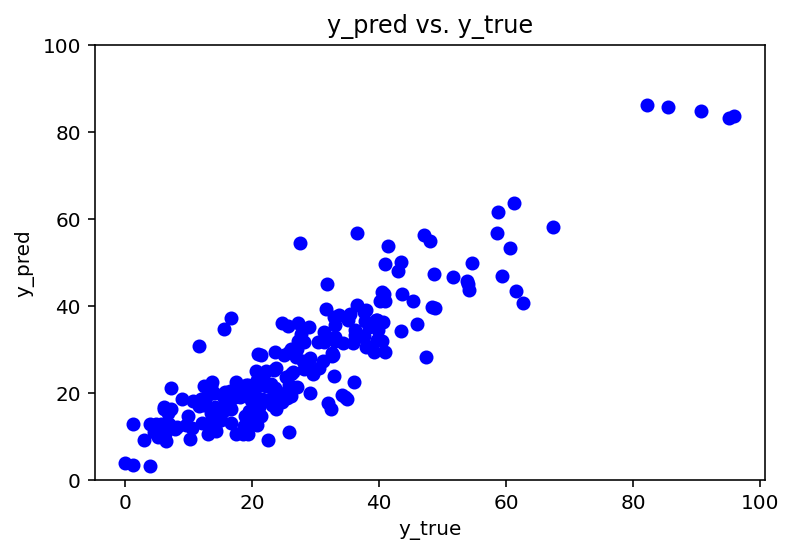

In [ ]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 100)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

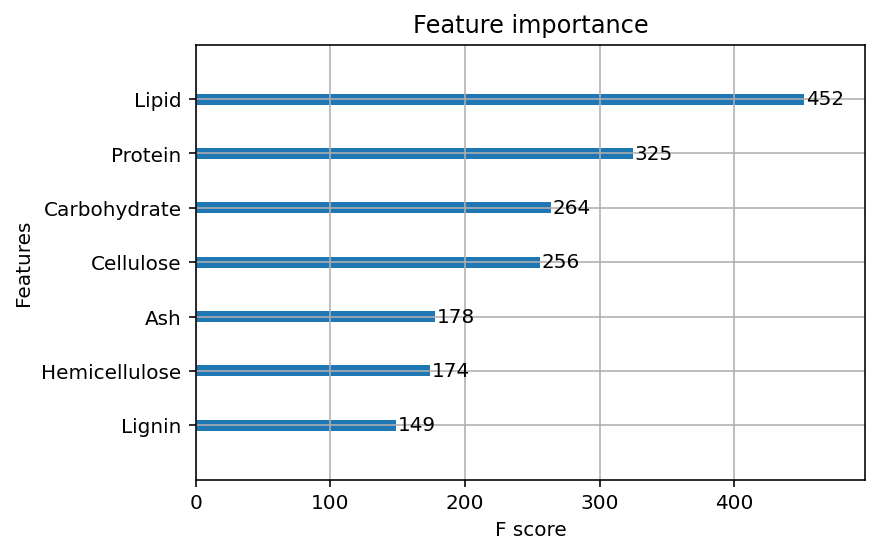

In [ ]:
plot_importance(model)
plt.show()